In [352]:
library(reshape2)
library(ggplot2)
library(cowplot)
library(dplyr)
library(tibble)

In [353]:
inflation=1.5
threshold=1e-10

#########################
#######################
###########################

read_files_and_make_lists <- function(file1, 
                                      file2, 
                                      file3, 
                                      file4, 
                                      file5, 
                                      file6, 
                                      file7, 
                                      file8, 
                                      file9, 
                                      file10, 
                                      file11) {
    
    # Read terms from files
    terms1  <- paste0(readLines(file1 ), ".t1")
    terms2  <- paste0(readLines(file2 ), ".t1")
    terms3  <- paste0(readLines(file3 ), ".t1")
    terms4  <- paste0(readLines(file4 ), ".t1")
    terms5  <- paste0(readLines(file5 ), ".t1")
    terms6  <- paste0(readLines(file6 ), ".t1")
    terms7  <- paste0(readLines(file7 ), ".t1")
    terms8  <- paste0(readLines(file8 ), ".t1")
    terms9  <- paste0(readLines(file9 ), ".t1")
    terms10 <- paste0(readLines(file10), ".t1")
    terms11 <- paste0(readLines(file11), ".t1")
    
    # Remove the first 7 characters from each term
    terms1  <- substr(terms1,  8, nchar(terms1 ))
    terms2  <- substr(terms2,  8, nchar(terms2 ))
    terms3  <- substr(terms3,  8, nchar(terms3 ))
    terms4  <- substr(terms4,  8, nchar(terms4 ))
    terms5  <- substr(terms5,  8, nchar(terms5 ))
    terms6  <- substr(terms6 , 8, nchar(terms6 ))
    terms7  <- substr(terms7 , 8, nchar(terms7 ))
    terms8  <- substr(terms8 , 8, nchar(terms8 ))
    terms9  <- substr(terms9 , 8, nchar(terms9 ))
    terms10 <- substr(terms10, 8, nchar(terms10))
    terms11 <- substr(terms11, 8, nchar(terms11))
    
    
    # Return a list of the terms
    return(list(terms1, terms2, terms3, terms4, terms5, terms6, terms7, terms8, terms9, terms10, terms11))
}

In [354]:
#########################
#######################
###########################

# Function to add column to the data frame
add_column_to_data <- function(data, 
                               file1, 
                               file2, 
                               file3, 
                               file4, 
                               file5, 
                               file6, 
                               file7, 
                               file8, 
                               file9, 
                               file10, 
                               file11) {
    # Read terms and make lists
    lists <- read_files_and_make_lists(file1, 
                                       file2, 
                                       file3, 
                                       file4, 
                                       file5, 
                                       file6, 
                                       file7, 
                                       file8, 
                                       file9, 
                                       file10, 
                                       file11)
    
    # Match terms to Var2 and add as a new column with list names
    for (i in 1:length(lists)) {
        match_idx <- match(lists[[i]], data$Var2)
        new_col_name <- paste0("list", i)
        data[new_col_name] <- NA
        data[new_col_name][!is.na(match_idx)] <- new_col_name
    }
    
    # Return the modified data frame
    return(data)
}

In [367]:
#########################
#######################
###########################

prep_and_plot <- function(name, type, length, namet){
    
    data <- as.matrix(read.csv(paste(name,"_",type,".csv",sep=""), header=T, row.names=1))
    melted_data <- melt(data)

    # add gene type
    file1  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_C.txt",sep="")
    file2  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_segmental.txt",sep="")
    file3  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_segmental.txt",sep="")
    file4  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_tandem.txt",sep="")
    file5  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_tandem.txt",sep="")
    file6  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_proximal.txt",sep="")
    file7  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_proximal.txt",sep="")
    file8  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_dispersed.txt",sep="")
    file9  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_dispersed.txt",sep="")
    file10 <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_singleton.txt",sep="")
    file11 <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_singleton.txt",sep="")

    lists <- read_files_and_make_lists(file1, 
                                       file2, 
                                       file3, 
                                       file4, 
                                       file5, 
                                       file6, 
                                       file7, 
                                       file8, 
                                       file9, 
                                       file10, 
                                       file11)

    # Add group column based on group keys
    melted_data$group <- ifelse(melted_data$Var2 %in% unlist(lists[1]), "ohnologs",
                         ifelse(melted_data$Var2 %in% unlist(lists[2]), "segmental wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[3]), "segmental woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[4]), "tandem wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[5]), "tandem woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[6]), "proximal wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[7]), "proximal woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[8]), "dispersed wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[9]), "dispersed woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[10]), "singleton wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[11]), "singleton woh",'no_ann')))))))))))
    
    vals = c(paste(type,'_1',sep=""),
             paste(type,'_2',sep=""),
             paste(type,'_3',sep=""),
             paste(type,'_4',sep=""),
             paste(type,'_5',sep=""),
             paste(type,'_6',sep=""),
             paste(type,'_7',sep=""),
             paste(type,'_8',sep=""),
             paste(type,'_9',sep=""),
             paste(type,'_10',sep=""),
             paste(type,'_last',sep="")
             )
    melted_data <- filter(melted_data, Var1 %in% vals)
    
    
    # Change outlier, color, shape and size
    p <- ggplot(melted_data, aes(x=value, y=Var1,fill=group)) + 
        geom_boxplot(outlier.shape = NA)+
        ylab("feature")+
        xlab("length (bp)")+
        ggtitle(namet)+
        scale_x_continuous(limits = c(0, length))+
        theme(text=element_text(size=20),
              plot.title = element_text(face = "italic"),
              legend.position="bottom")
    
    my_list <- list("plot" = p, "df" = melted_data)
    return(my_list) 
}

#############################
############################
###########################

make_legend <- function(name, type){
    
    data <- as.matrix(read.csv(paste(name,"_",type,".csv",sep=""), header=T, row.names=1))
    melted_data <- melt(data)

    # add gene type
    file1  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_C.txt",sep="")
    file2  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_segmental.txt",sep="")
    file3  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_segmental.txt",sep="")
    file4  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_tandem.txt",sep="")
    file5  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_tandem.txt",sep="")
    file6  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_proximal.txt",sep="")
    file7  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_proximal.txt",sep="")
    file8  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_dispersed.txt",sep="")
    file9  <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_dispersed.txt",sep="")
    file10 <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",inflation,"_singleton.txt",sep="")
    file11 <- paste("/work/WGD/GO/from_braker/ohno_list/", name, "_",threshold,"_singleton.txt",sep="")

    lists <- read_files_and_make_lists(file1, 
                                       file2, 
                                       file3, 
                                       file4, 
                                       file5, 
                                       file6, 
                                       file7, 
                                       file8, 
                                       file9, 
                                       file10, 
                                       file11)

    # Add group column based on group keys
    melted_data$group <- ifelse(melted_data$Var2 %in% unlist(lists[1]), "ohnologs",
                         ifelse(melted_data$Var2 %in% unlist(lists[2]), "segmental wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[3]), "segmental woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[4]), "tandem wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[5]), "tandem woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[6]), "proximal wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[7]), "proximal woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[8]), "dispersed wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[9]), "dispersed woh",
                         ifelse(melted_data$Var2 %in% unlist(lists[10]), "singleton wh",
                         ifelse(melted_data$Var2 %in% unlist(lists[11]), "singleton woh",'no_ann')))))))))))
    
    melted_data$group <- factor(melted_data$group , levels=c("ohnologs",
                                                             "segmental wh",
                                                             "segmental woh",
                                                             "tandem wh",
                                                             "tandem woh",
                                                             "proximal wh",
                                                             "proximal woh",
                                                             "dispersed wh",
                                                             "dispersed woh",
                                                             "singleton wh",
                                                             "singleton woh",
                                                             "no_ann"))

    # make legend only
    legend <- ggplot(melted_data, aes(x=value, y=Var1,fill=group)) + 
            geom_boxplot(outlier.shape = NA)+
            ylab("feature")+
            xlab("length (bp)")+
            ggtitle(name)+
            scale_x_continuous(limits = c(0, 17000))+
            theme(text=element_text(size=20),
                  plot.title = element_text(face = "italic"),
                  legend.direction="horizontal")
    legend <- cowplot::get_legend(legend)
    legend
}

In [370]:
p1  <- prep_and_plot("CARROT",  "intron", 17000, "C. rotundicauda")
p2  <- prep_and_plot("TACGIG",  "intron", 17000, "T. gigas")
p3  <- prep_and_plot("DYSSIL",  "intron", 17000, "D. silvatica")
p4  <- prep_and_plot("ECTDAV",  "intron", 17000, "E. davidi")
p5  <- prep_and_plot("ULODIV",  "intron", 17000, "U. diversus")
p6  <- prep_and_plot("LATELE",  "intron", 17000, "L. elegans")
p7  <- prep_and_plot("PARTEP",  "intron", 17000, "P. tepidariorum")
p8  <- prep_and_plot("HYLGRA",  "intron", 17000, "H. graminicola")
p9  <- prep_and_plot("OEDGIB",  "intron", 17000, "O. gibbosus")
p10 <- prep_and_plot("ARGBRU",  "intron", 17000, "A. bruennichi")
p11 <- prep_and_plot("TRIANT",  "intron", 17000, "T. antipodiana")
p12 <- prep_and_plot("TRICLA",  "intron", 17000, "T. clavata")
legend <- make_legend("ULODIV", "intron")


Warning message:
“Removed 484567 rows containing non-finite values (`stat_boxplot()`).”


Warning message:
“Removed 184970 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 330621 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167027 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 205202 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 213335 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 282699 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 153642 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 220106 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 125173 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 230932 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 174713 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 312247

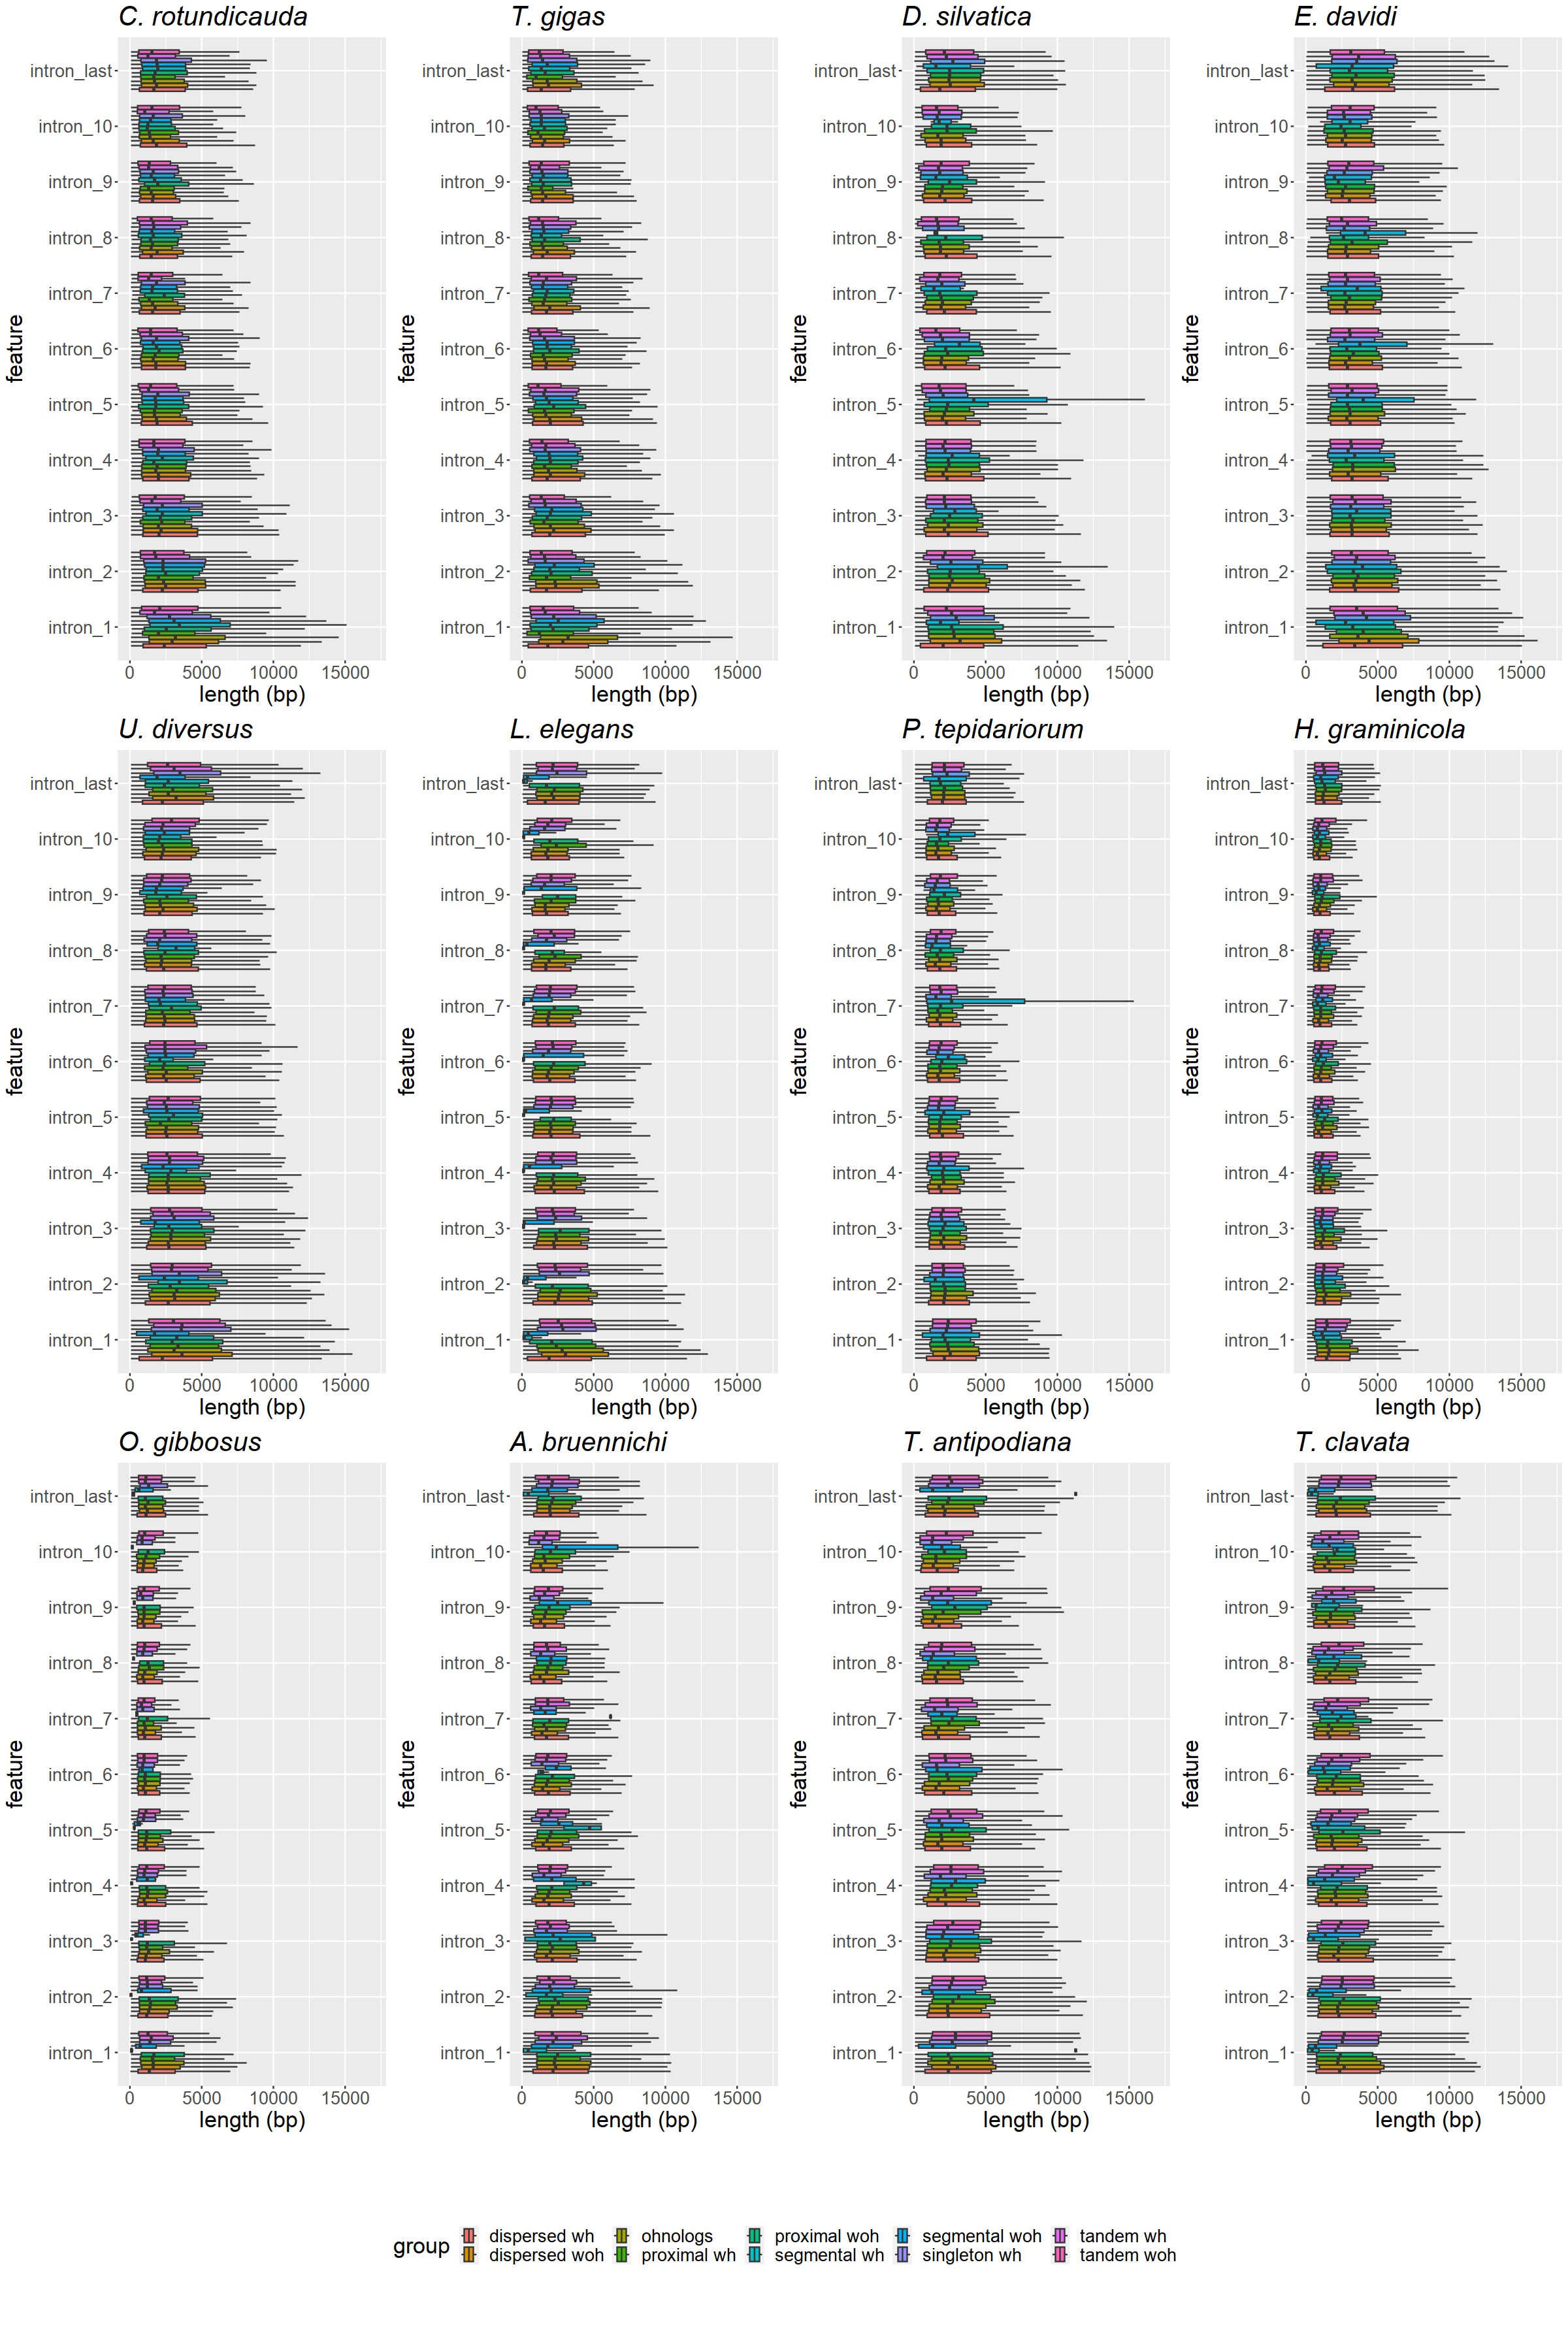

In [371]:
options(repr.plot.width=20, repr.plot.height=30)
p <- plot_grid(
p1$plot  + theme(legend.position="none") ,
p2$plot  + theme(legend.position="none") ,
p3$plot  + theme(legend.position="none") ,
p4$plot  + theme(legend.position="none") ,
p5$plot  + theme(legend.position="none") ,
p6$plot  + theme(legend.position="none") ,
p7$plot  + theme(legend.position="none") ,
p8$plot  + theme(legend.position="none") ,
p9$plot  + theme(legend.position="none") ,
p10$plot + theme(legend.position="none") ,
p11$plot + theme(legend.position="none") ,
p12$plot + theme(legend.position="none") ,
ncol=4)

legend <- get_legend(
  p1$plot + 
    guides(color = guide_legend(nrow = 1)) +
    theme(legend.position = "bottom")
)



p <- plot_grid(p, legend, ncol=1, rel_heights=c(10,1))

p

In [372]:
all_exon <- rbind(
    p1$df,
    p2$df,
    p3$df,
    p4$df,
    p5$df,
    p6$df,
    p7$df,
    p8$df,
    p9$df,
    p10$df,
    p11$df,
    p12$df)

In [373]:
p <- ggplot(all_exon, aes(x=value, y=Var1,fill=group)) + 
        geom_boxplot(outlier.shape = NA)+
        ylab("feature")+
        xlab("length (bp)")+
        ggtitle("all exons")+
        scale_x_continuous(limits = c(0, 17000))+
        theme(text=element_text(size=20),
              plot.title = element_text(face = "italic"),
              legend.position="right")
    

Warning message:
“Removed 2600667 rows containing non-finite values (`stat_boxplot()`).”


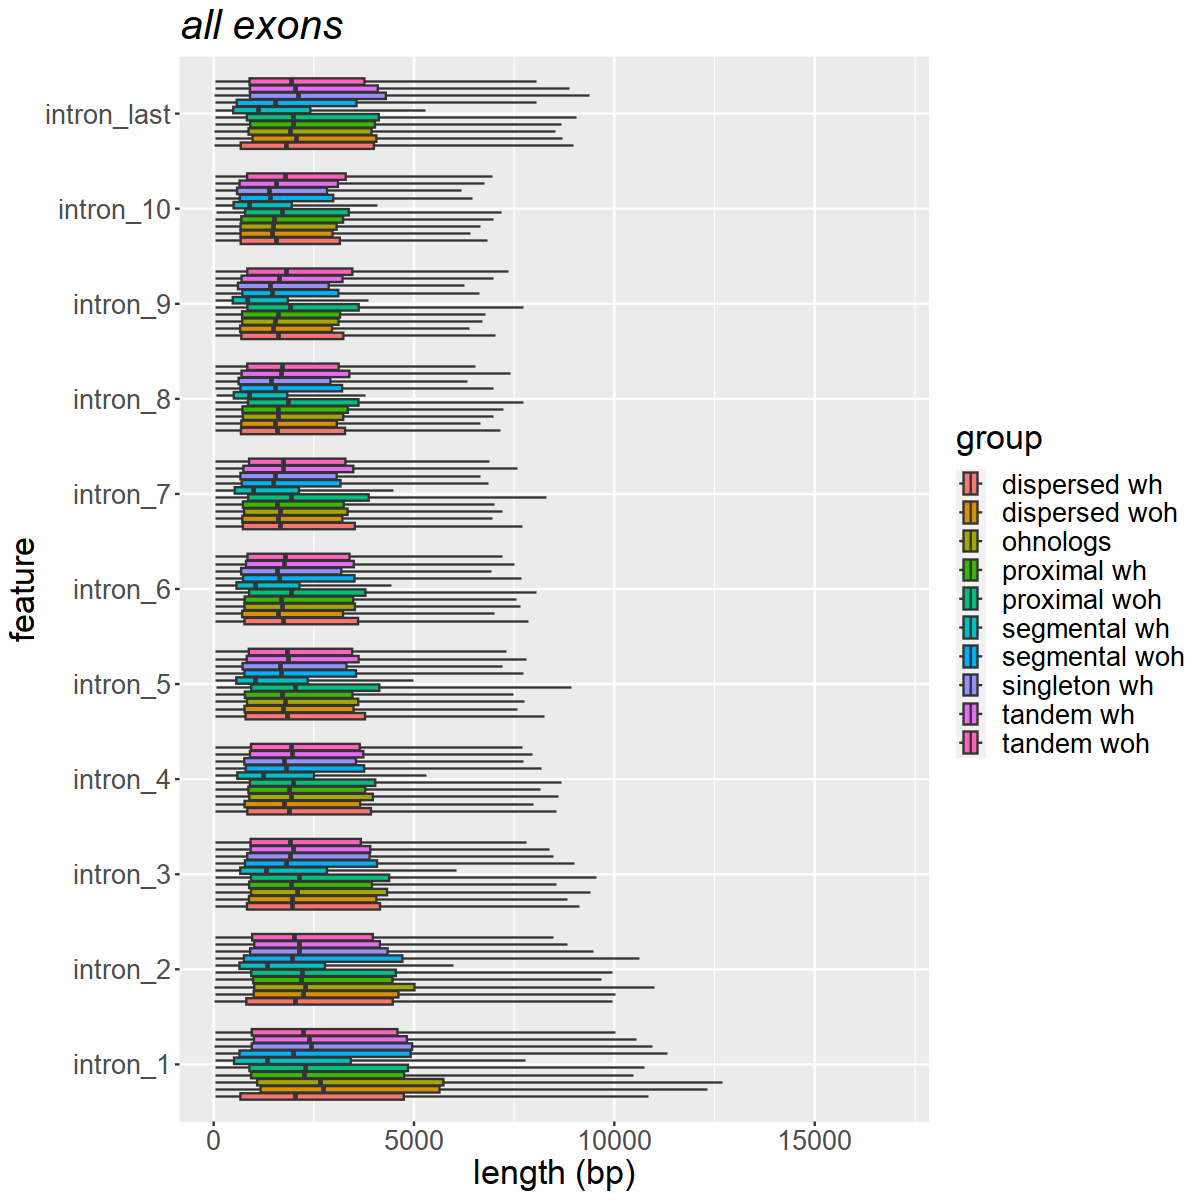

In [374]:
options(repr.plot.width=10, repr.plot.height=10)
p

In [375]:
p1  <- prep_and_plot("CARROT",  "exon", 1100, "C. rotundicauda")
p2  <- prep_and_plot("TACGIG",  "exon", 1100, "T. gigas")
p3  <- prep_and_plot("DYSSIL",  "exon", 1100, "D. silvatica")
p4  <- prep_and_plot("ECTDAV",  "exon", 1100, "E. davidi")
p5  <- prep_and_plot("ULODIV",  "exon", 1100, "U. diversus")
p6  <- prep_and_plot("LATELE",  "exon", 1100, "L. elegans")
p7  <- prep_and_plot("PARTEP",  "exon", 1100, "P. tepidariorum")
p8  <- prep_and_plot("HYLGRA",  "exon", 1100, "H. graminicola")
p9  <- prep_and_plot("OEDGIB",  "exon", 1100, "O. gibbosus")
p10 <- prep_and_plot("ARGBRU",  "exon", 1100, "A. bruennichi")
p11 <- prep_and_plot("TRIANT",  "exon", 1100, "T. antipodiana")
p12 <- prep_and_plot("TRICLA",  "exon", 1100, "T. clavata")
legend <- make_legend("ULODIV", "exon")


Warning message:
“Removed 440203 rows containing non-finite values (`stat_boxplot()`).”


Warning message:
“Removed 157070 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 287279 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 140132 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 171574 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 180180 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 239089 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 130686 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 187218 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 106242 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 195586 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 147021 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 260792

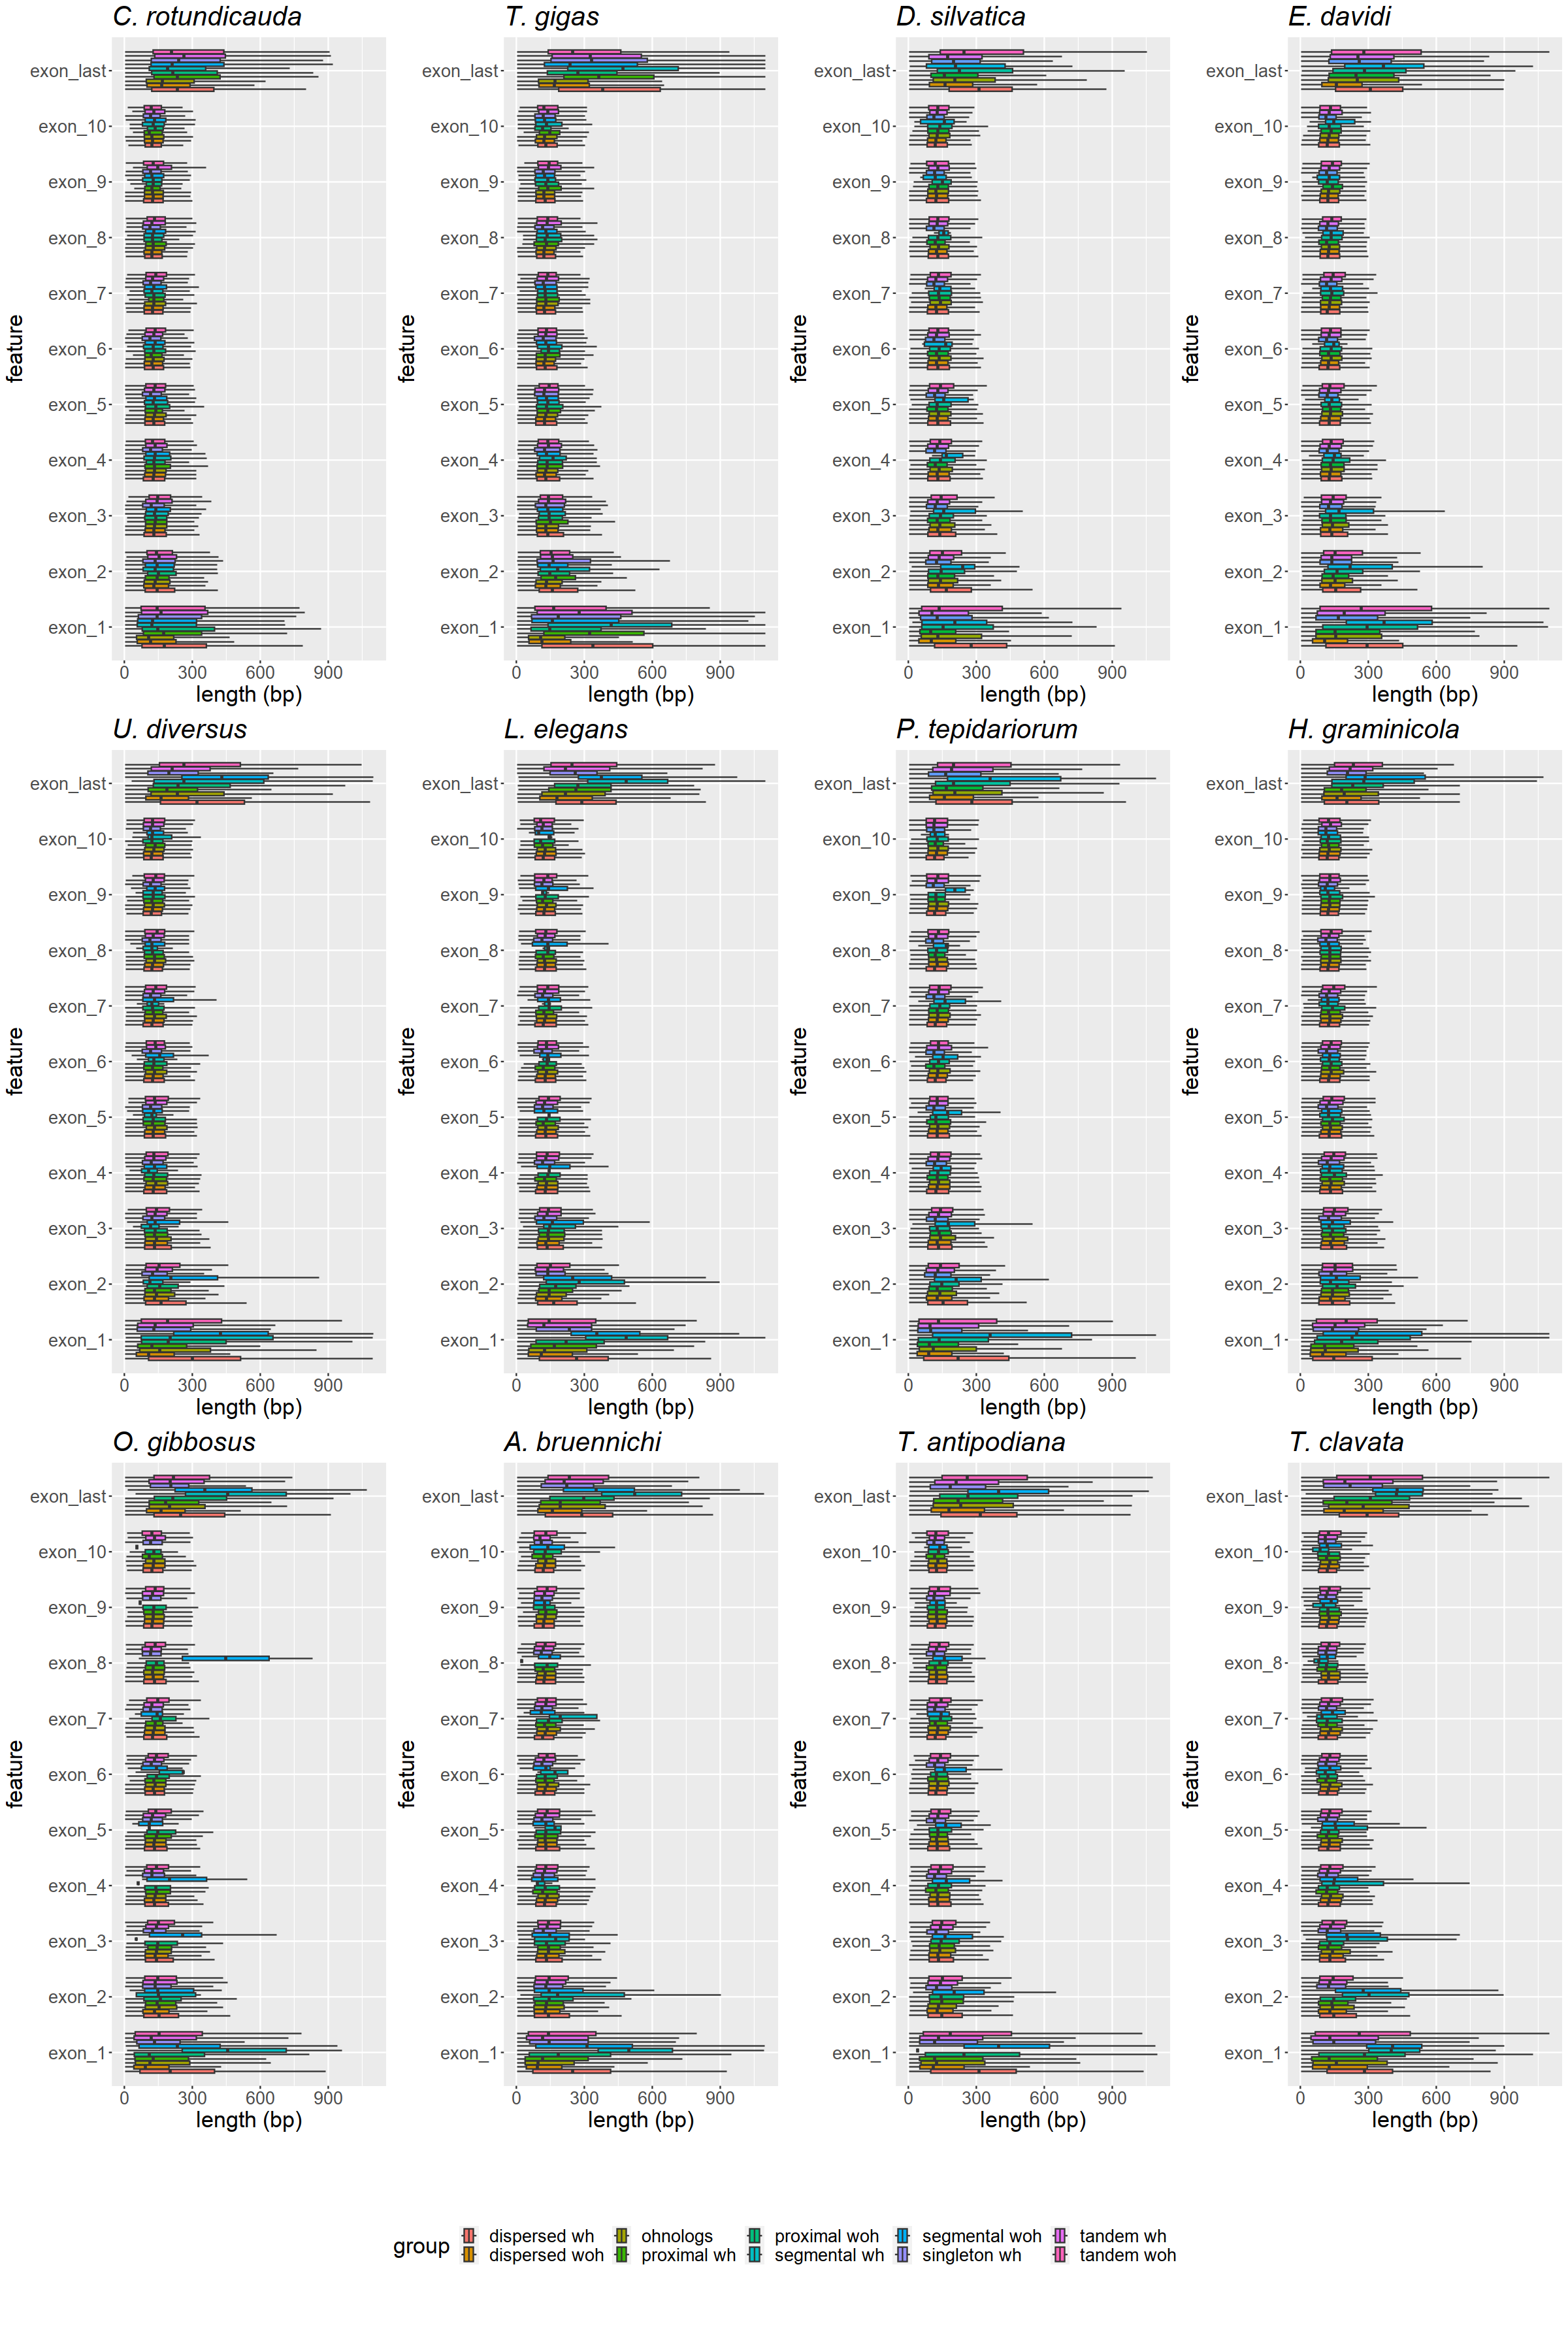

In [381]:
options(repr.plot.width=20, repr.plot.height=30)
p <- plot_grid(
p1$plot  + theme(legend.position="none"),
p2$plot  + theme(legend.position="none"),
p3$plot  + theme(legend.position="none"),
p4$plot  + theme(legend.position="none"),
p5$plot  + theme(legend.position="none"),
p6$plot  + theme(legend.position="none"),
p7$plot  + theme(legend.position="none"),
p8$plot  + theme(legend.position="none"),
p9$plot  + theme(legend.position="none"),
p10$plot + theme(legend.position="none"),
p11$plot + theme(legend.position="none"),
p12$plot + theme(legend.position="none"),
ncol=4)

legend <- get_legend(
  p1$plot + 
    guides(color = guide_legend(nrow = 1)) +
    theme(legend.position = "bottom")
)

p <- plot_grid(p, legend, ncol=1, rel_heights=c(10,1))


p

In [382]:
all_intron <- rbind(
    p1$df,
    p2$df,
    p3$df,
    p4$df,
    p5$df,
    p6$df,
    p7$df,
    p8$df,
    p9$df,
    p10$df,
    p11$df,
    p12$df)

In [702]:
p <- ggplot(all_intron, aes(x=value, y=Var1, color=group)) + 
        geom_boxplot(outlier.shape = NA)+
        ylab("feature")+
        xlab("length (bp)")+
        ggtitle("all introns")+
        scale_x_continuous(limits = c(0, 1100))+
        theme(text=element_text(size=20),
              plot.title = element_text(face = "bold"),
              legend.position="right")+
        scale_color_manual(values = c("black", 
                                       "orange", 
                                       "#EE7733",
                                       "#EE7733", 
                                       "#0077BB",
                                       "#0077BB",
                                       "#009988", 
                                       "#009988",
                                       "#33BBEE",
                                       "#33BBEE",
                                       "#CC3311",
                                       "#CC3311"))
    

Warning message:
“Removed 2202869 rows containing non-finite values (`stat_boxplot()`).”


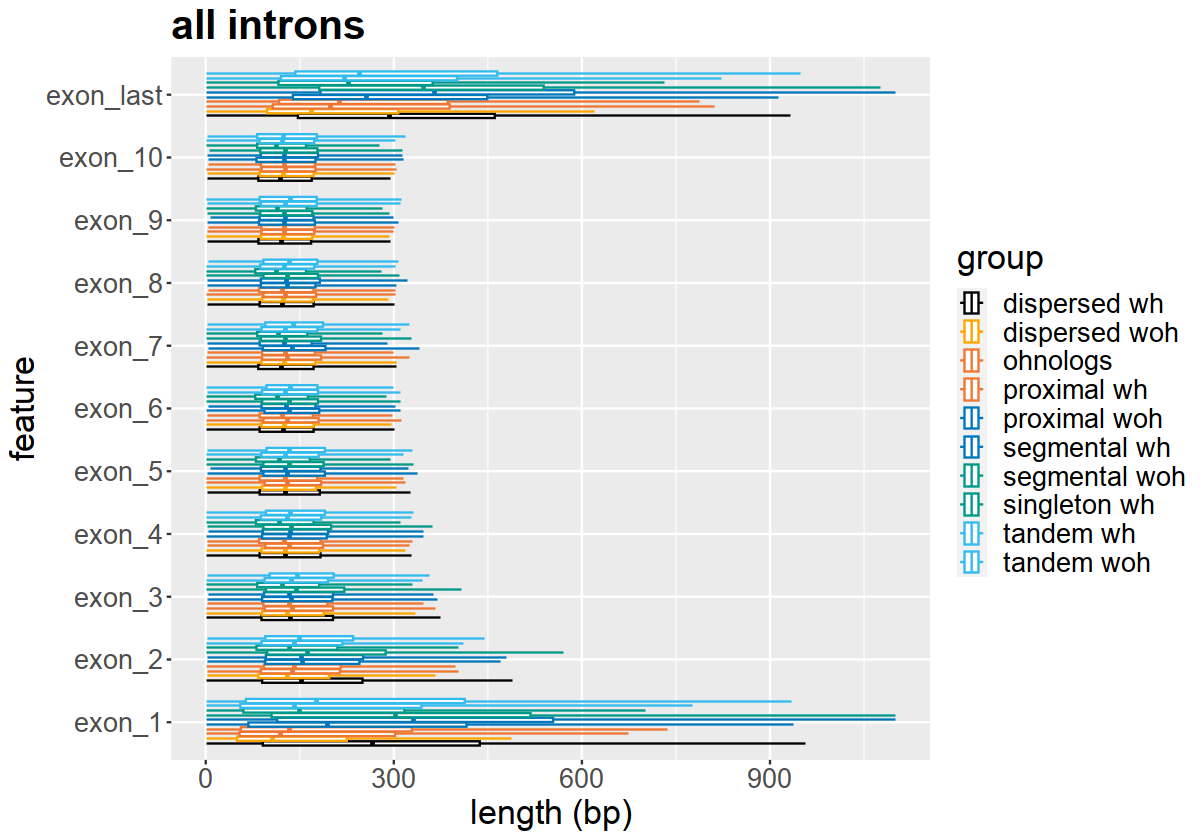

In [704]:
options(repr.plot.width=10, repr.plot.height=7)
plot_grid(p)

In [701]:
all_intron

Var1      Var2      value group        
1       exon_1    g1.t1     815   singleton wh 
2       exon_2    g1.t1      NA   singleton wh 
3       exon_3    g1.t1      NA   singleton wh 
4       exon_4    g1.t1      NA   singleton wh 
5       exon_5    g1.t1      NA   singleton wh 
6       exon_6    g1.t1      NA   singleton wh 
7       exon_7    g1.t1      NA   singleton wh 
8       exon_8    g1.t1      NA   singleton wh 
9       exon_9    g1.t1      NA   singleton wh 
10      exon_10   g1.t1      NA   singleton wh 
11      exon_last g1.t1     815   singleton wh 
12      exon_1    g2.t1      31   singleton wh 
13      exon_2    g2.t1     248   singleton wh 
14      exon_3    g2.t1     291   singleton wh 
15      exon_4    g2.t1      NA   singleton wh 
16      exon_5    g2.t1      NA   singleton wh 
17      exon_6    g2.t1      NA   singleton wh 
18      exon_7    g2.t1      NA   singleton wh 
19      exon_8    g2.t1      NA   singleton wh 
20      exon_9    g2.t1      NA   singleton wh 
21      exon_10   g2.t1      NA   singleton wh 
22      exon_last g2.t1     291   singleton wh 
23      exon_1    g3.t1      19   singleton wh 
24      exon_2    g3.t1     274   singleton wh 
25      exon_3    g3.t1     484   singleton wh 
26      exon_4    g3.t1      NA   singleton wh 
27      exon_5    g3.t1      NA   singleton wh 
28      exon_6    g3.t1      NA   singleton wh 
29      exon_7    g3.t1      NA   singleton wh 
30      exon_8    g3.t1      NA   singleton wh 
⋮       ⋮         ⋮         ⋮     ⋮            
3985777 exon_4    g39678.t1  NA   segmental woh
3985778 exon_5    g39678.t1  NA   segmental woh
3985779 exon_6    g39678.t1  NA   segmental woh
3985780 exon_7    g39678.t1  NA   segmental woh
3985781 exon_8    g39678.t1  NA   segmental woh
3985782 exon_9    g39678.t1  NA   segmental woh
3985783 exon_10   g39678.t1  NA   segmental woh
3985784 exon_last g39678.t1 362   segmental woh
3985785 exon_1    g39679.t1  79   dispersed wh 
3985786 exon_2    g39679.t1 195   dispersed wh 
3985787 exon_3    g39679.t1  83   dispersed wh 
3985788 exon_4    g39679.t1 154   dispersed wh 
3985789 exon_5    g39679.t1 282   dispersed wh 
3985790 exon_6    g39679.t1 184   dispersed wh 
3985791 exon_7    g39679.t1 120   dispersed wh 
3985792 exon_8    g39679.t1 212   dispersed wh 
3985793 exon_9    g39679.t1  NA   dispersed wh 
3985794 exon_10   g39679.t1  NA   dispersed wh 
3985795 exon_last g39679.t1 212   dispersed wh 
3985796 exon_1    g39680.t1  46   dispersed wh 
3985797 exon_2    g39680.t1  96   dispersed wh 
3985798 exon_3    g39680.t1  46   dispersed wh 
3985799 exon_4    g39680.t1  69   dispersed wh 
3985800 exon_5    g39680.t1  67   dispersed wh 
3985801 exon_6    g39680.t1  84   dispersed wh 
3985802 exon_7    g39680.t1  NA   dispersed wh 
3985803 exon_8    g39680.t1  NA   dispersed wh 
3985804 exon_9    g39680.t1  NA   dispersed wh 
3985805 exon_10   g39680.t1  NA   dispersed wh 
3985806 exon_last g39680.t1  84   dispersed wh

In [454]:
prep_data <- function(infile){
    data = read.csv(infile, header=TRUE)
    data <- transform(data, isoforms = as.vector(X))
    data[is.na(data)] <- 0
    data <- data[order(data$isoforms, decreasing = FALSE),]
    data[1:6,]
}

dp1  <- prep_data("/work/WGD/isoforms/CARROT_iso_sum.csv")
dp2  <- prep_data("/work/WGD/isoforms/TACGIG_iso_sum.csv")
dp3  <- prep_data("/work/WGD/isoforms/DYSSIL_iso_sum.csv")
dp4  <- prep_data("/work/WGD/isoforms/ECTDAV_iso_sum.csv")
dp5  <- prep_data("/work/WGD/isoforms/ULODIV_iso_sum.csv")
dp6  <- prep_data("/work/WGD/isoforms/LATELE_iso_sum.csv")
dp7  <- prep_data("/work/WGD/isoforms/PARTEP_iso_sum.csv")
dp8  <- prep_data("/work/WGD/isoforms/HYLGRA_iso_sum.csv")
dp9  <- prep_data("/work/WGD/isoforms/OEDGIB_iso_sum.csv")
dp10 <- prep_data("/work/WGD/isoforms/ARGBRU_iso_sum.csv")
dp11 <- prep_data("/work/WGD/isoforms/TRIANT_iso_sum.csv")
dp12 <- prep_data("/work/WGD/isoforms/TRICLA_iso_sum.csv")

In [455]:

all_data <- bind_rows(
          dp3  %>% rowid_to_column("ID"),
          dp4  %>% rowid_to_column("ID"),
          dp5  %>% rowid_to_column("ID"),
          dp6  %>% rowid_to_column("ID"),
          dp7  %>% rowid_to_column("ID"),
          dp8  %>% rowid_to_column("ID"),
          dp9  %>% rowid_to_column("ID"),
          dp10 %>% rowid_to_column("ID"),
          dp11 %>% rowid_to_column("ID"),
          dp12 %>% rowid_to_column("ID")
         ) %>%
  group_by(ID) %>%
  summarise(across(everything(),sum)/10)

In [456]:
all_data <- as.data.frame(all_data)
all_data <- mutate_at(all_data , vars(isoforms), as.factor)
all_data <- all_data[-1]
all_data <- all_data[-1]

Using isoforms as id variables



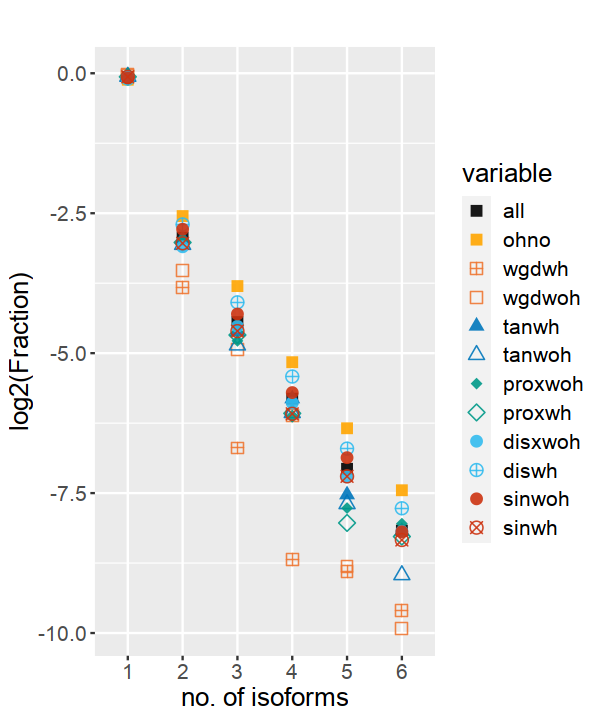

In [457]:
options(repr.plot.width=5, repr.plot.height=6)

#'#EE7733','#0077BB','#CC3311','#009988','#33BBEE'

    p <- ggplot(melt(all_data), aes(x=as.factor(isoforms), y=log(value), col=variable, shape=variable)) + 
         geom_point(alpha=0.9, size=3)+
         scale_shape_manual(values = c(15, 15, 12, 0, 17, 2, 18, 5, 16, 10, 16, 13))+
         scale_color_manual(values = c("black", 
                                       "orange", 
                                       "#EE7733",
                                       "#EE7733", 
                                       "#0077BB",
                                       "#0077BB",
                                       "#009988", 
                                       "#009988",
                                       "#33BBEE",
                                       "#33BBEE",
                                       "#CC3311",
                                       "#CC3311"))+
         theme(plot.title = element_text(face = "bold"),
                                  text=element_text(size=15),
                                  legend.position="right")+
         ggtitle(" ")+
         ylab("log2(Fraction)")+
         xlab("no. of isoforms")#+geom_jitter()
    p


In [458]:
plot_iso_histo <- function(infile, namet){
    data = read.csv(infile, header=TRUE)
    data <- transform(data, isoforms = as.factor(X)) 

    p <- ggplot(melt(data[-1]), aes(x=isoforms, y=log(value), col=variable, shape=variable)) + 
         geom_point(alpha=0.9)+
         scale_shape_manual(values = c(15, 15, 12, 0, 17, 2, 18, 5, 16, 10, 16, 13))+
         scale_color_manual(values = c("black", 
                                       "orange", 
                                       "#EE7733",
                                       "#EE7733", 
                                       "#0077BB",
                                       "#0077BB",
                                       "#009988", 
                                       "#009988",
                                       "#33BBEE",
                                       "#33BBEE",
                                       "#CC3311",
                                       "#CC3311"))+
         theme(plot.title = element_text(face = "italic"),
                                  text=element_text(size=15),
                                  legend.position="none")+
         ggtitle(namet)+
         ylab("log2(Fraction)")+
         xlab("no. of isoforms")
    p
}


plot_iso_legen <- function(infile){
    data = read.csv(infile, header=TRUE)
    data <- transform(data, isoforms = as.factor(X)) 

    legend <- ggplot(melt(data[-1]), aes(x=isoforms, y=value, col=variable, shape=variable)) + 
              geom_point(alpha=0.9)+
    scale_shape_manual(values = c(15, 15, 12, 0, 17, 2, 18, 5, 16, 10, 16, 13))+
    scale_color_manual(values = c("black", 
                                       "orange", 
                                       "#EE7733",
                                       "#EE7733", 
                                       "#0077BB",
                                       "#0077BB",
                                       "#009988", 
                                       "#009988",
                                       "#33BBEE",
                                       "#33BBEE",
                                       "#CC3311",
                                       "#CC3311"))+
    theme(text=element_text(size=20),
                  plot.title = element_text(face = "italic"),
                  legend.direction="horizontal")
    legend <- cowplot::get_legend(legend)
    legend
}

In [459]:
p1 <-  plot_iso_histo("/work/WGD/isoforms/CARROT_iso_sum.csv" , "C. rotundicauda")
p2 <-  plot_iso_histo("/work/WGD/isoforms/TACGIG_iso_sum.csv" , "T. gigas")
p3 <-  plot_iso_histo("/work/WGD/isoforms/DYSSIL_iso_sum.csv" , "D. silvatica")
p4 <-  plot_iso_histo("/work/WGD/isoforms/ECTDAV_iso_sum.csv" , "E. davidi")
p5 <-  plot_iso_histo("/work/WGD/isoforms/ULODIV_iso_sum.csv" , "U. diversus")
p6 <-  plot_iso_histo("/work/WGD/isoforms/LATELE_iso_sum.csv" , "L. elegans")
p7 <-  plot_iso_histo("/work/WGD/isoforms/PARTEP_iso_sum.csv" , "P. tepidariorum")
p8 <-  plot_iso_histo("/work/WGD/isoforms/HYLGRA_iso_sum.csv" , "H. graminicola")
p9 <-  plot_iso_histo("/work/WGD/isoforms/OEDGIB_iso_sum.csv" , "O. gibbosus")
p10 <- plot_iso_histo("/work/WGD/isoforms/ARGBRU_iso_sum.csv", "A. bruennichi")
p11 <- plot_iso_histo("/work/WGD/isoforms/TRIANT_iso_sum.csv", "T. antipodiana")
p12 <- plot_iso_histo("/work/WGD/isoforms/TRICLA_iso_sum.csv", "T. clavata")
leg <- plot_iso_legen("/work/WGD/isoforms/TACGIG_iso_sum.csv")


Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Using isoforms as id variables

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 37 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 48 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 19 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 34 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 37 rows containing missing values (`geom_point()`).”


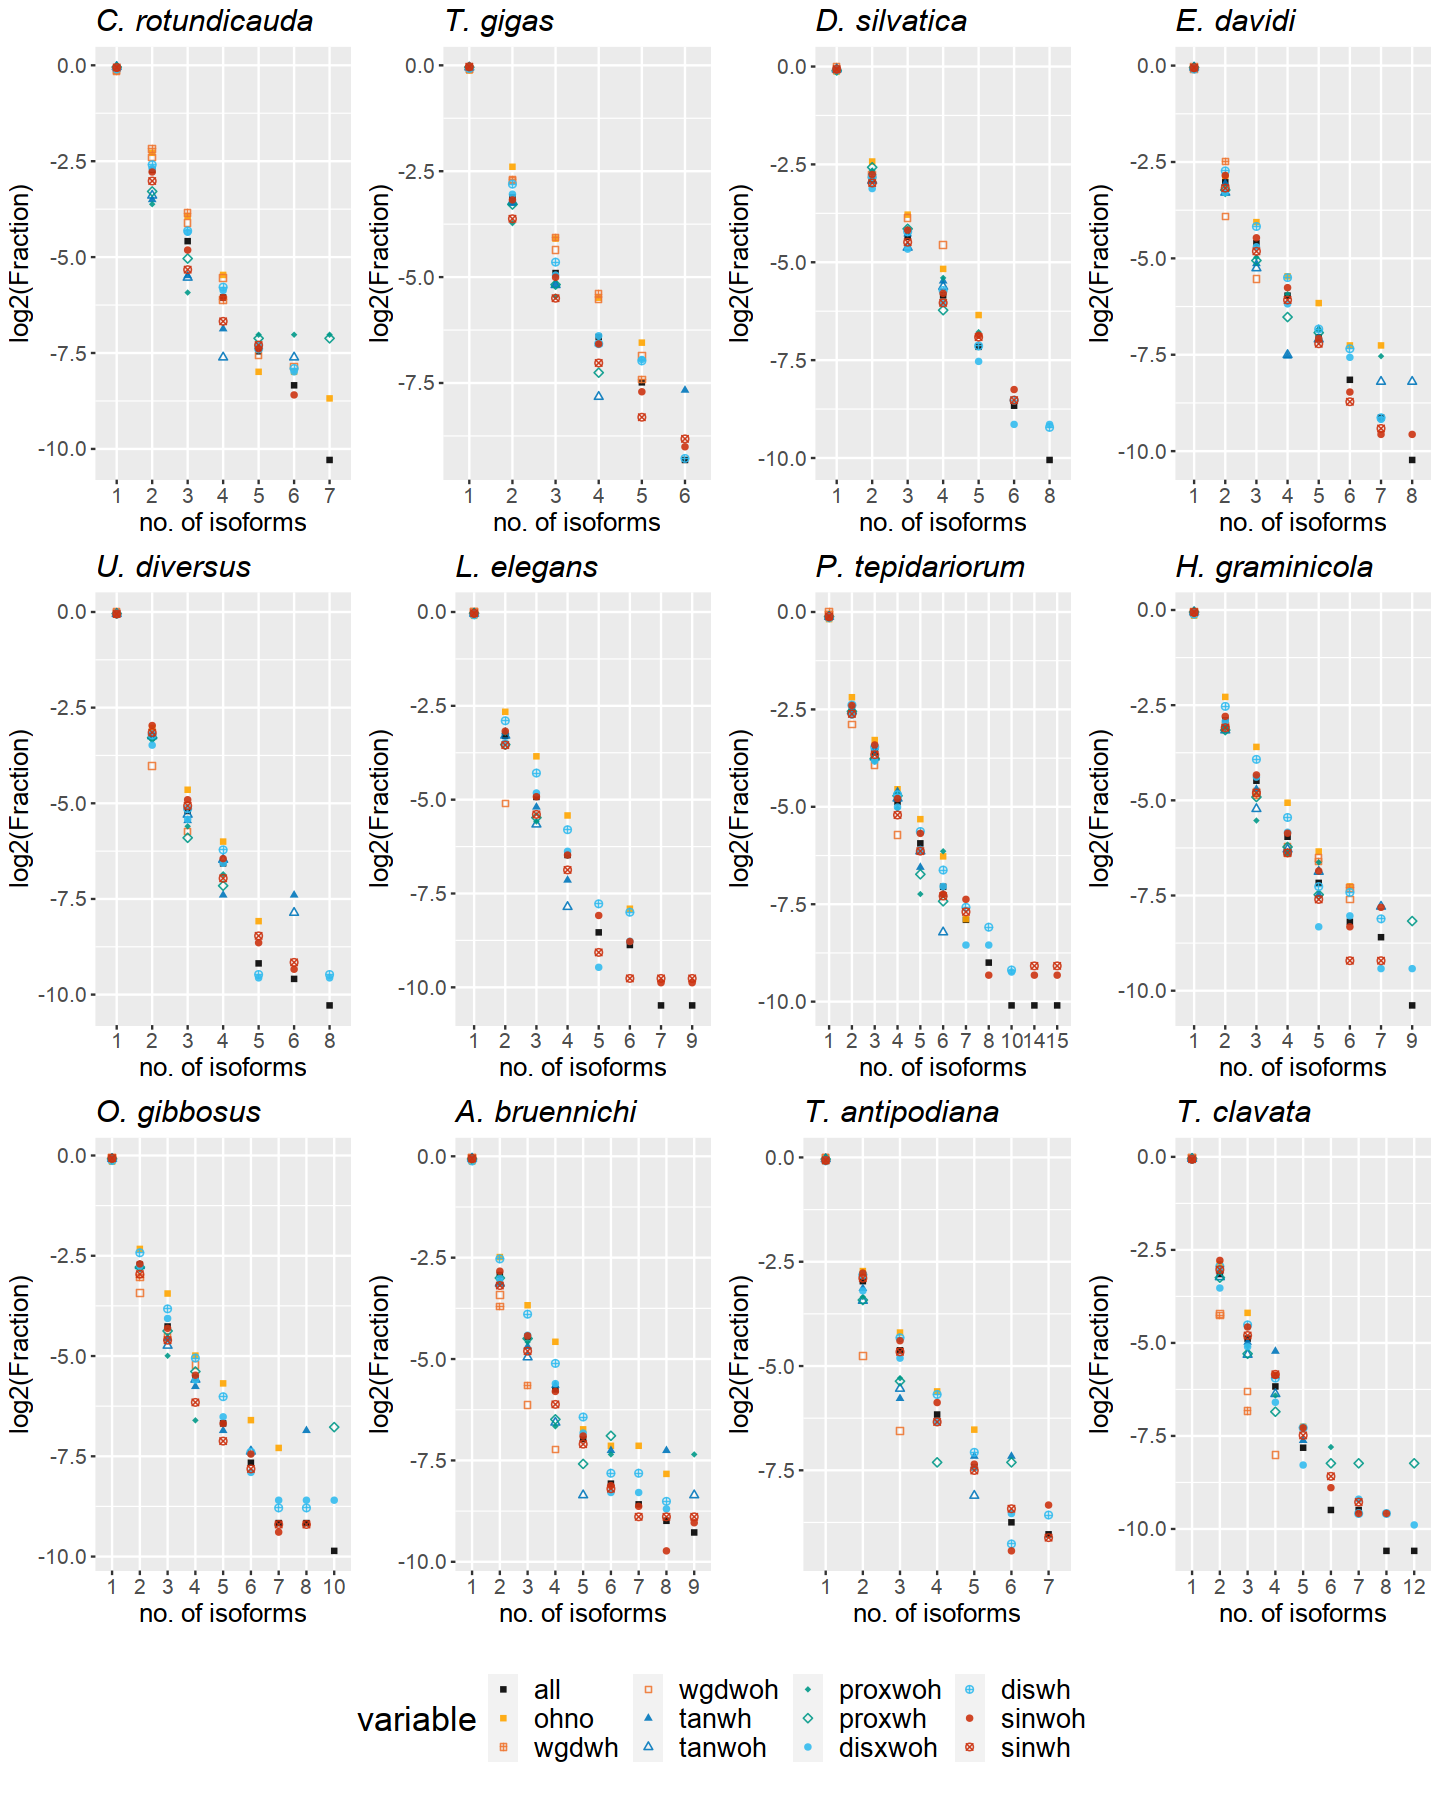

In [460]:
options(repr.plot.width=12, repr.plot.height=15)
p <- plot_grid(
p1 ,
p2 ,
p3 ,
p4 ,
p5 ,
p6 ,
p7 ,
p8 ,
p9 ,
p10,
p11,
p12,
ncol=4)

p <- plot_grid(p, leg, ncol=1, rel_heights=c(10,1))

p

In [461]:
#row.names(data) <- c(1:nrow(data))

In [696]:
d1  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/CARROT_df.csv", header=TRUE)
d2  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/TACGIG_df.csv", header=TRUE)
d3  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/DYSSIL_df.csv", header=TRUE)
d4  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/ECTDAV_df.csv", header=TRUE)
d5  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/ULODIV_df.csv", header=TRUE)
d6  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/LATELE_df.csv", header=TRUE)
d7  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/PARTEP_df.csv", header=TRUE)
d8  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/HYLGRA_df.csv", header=TRUE)
d9  <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/OEDGIB_df.csv", header=TRUE)
d10 <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/ARGBRU_df.csv", header=TRUE)
d11 <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/TRIANT_df.csv", header=TRUE)
d12 <- read.csv("/work/WGD/RM/promotor_repeats/1000sam_1000up_0down/TRICLA_df.csv", header=TRUE)

In [697]:
data <- rbind(
d1 ,
d2 ,
d3 ,
d4 ,
d5 ,
d6 ,
d7 ,
d8 ,
d9 ,
d10,
d11,
d12)

In [698]:
#data[order(data$ohno, decreasing = TRUE),]

In [699]:
plot_ecdf <- function(data){
    data[is.na(data)] <- 0
    row.names(data) <- c(1:nrow(data))
    data <- melt(data[order(data$ohno, decreasing = TRUE),])
    p <- ggplot(data,aes(value, col=variable))+
        geom_line(stat = "ecdf",aes(linetype=variable))+
        scale_x_continuous(expand = c(0, 0), limits = c(0, NA)) + 
        scale_y_continuous(expand = c(0, 0), limits = c(0, NA))+
        scale_color_manual(values = c("orange", 
                                      "black", 
                                      "#33BBEE",
                                      "#009988",
                                      "#EE7733", 
                                      "#CC3311",
                                      "#0077BB"))+
        scale_linetype_manual(values=c("dashed", "solid", "solid", "solid", "solid", "solid", "solid"))
    
    my_list <- list("plot" = p, "df" = data)
    return(my_list) 

}

No id variables; using all as measure variables



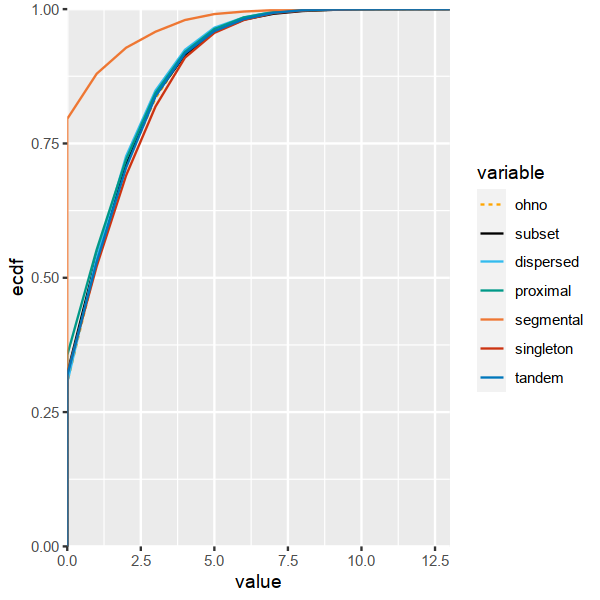

In [700]:
options(repr.plot.width=5, repr.plot.height=5)
p <- plot_ecdf(data)
p$plot

In [684]:
nrow(data[data$segmental > -1, ])

[1] 12000

In [506]:
data <- read.csv("/work/WGD/RM/promotor_repeats/with_EDTA/ARGBRUsingleton.csv", header=TRUE)

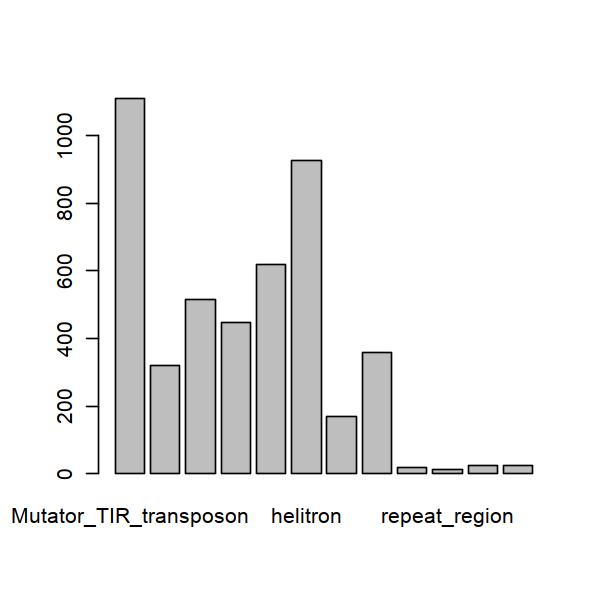

In [98]:
barplot(colSums(data[3:ncol(data)],))

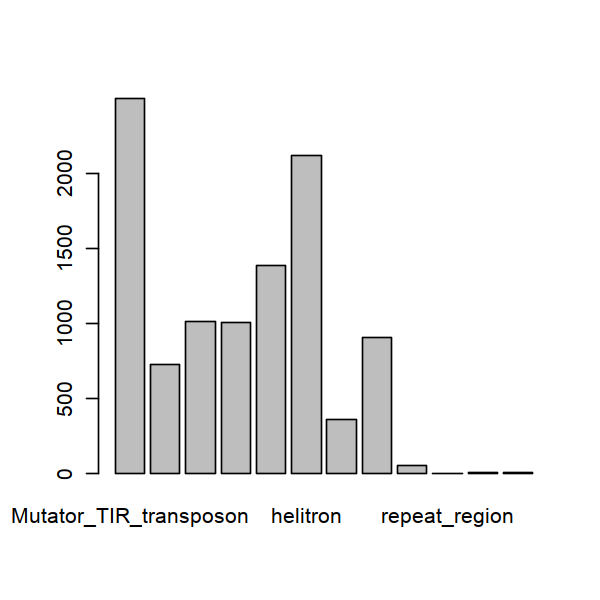

In [100]:
barplot(colSums(data[3:ncol(data)],))

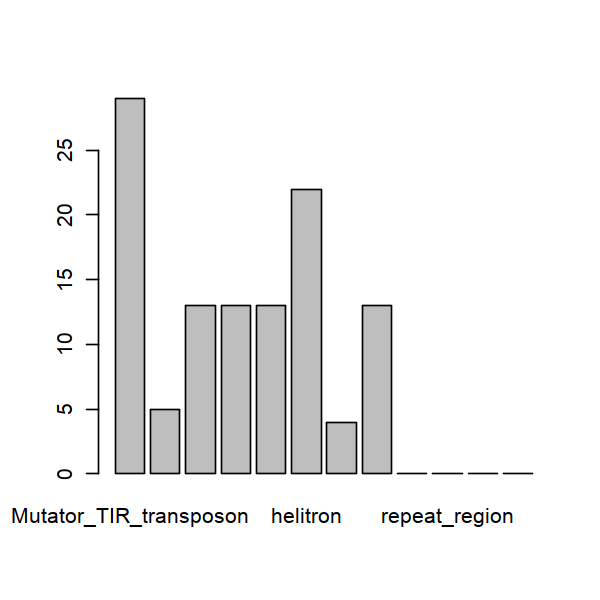

In [102]:
barplot(colSums(data[3:ncol(data)],))

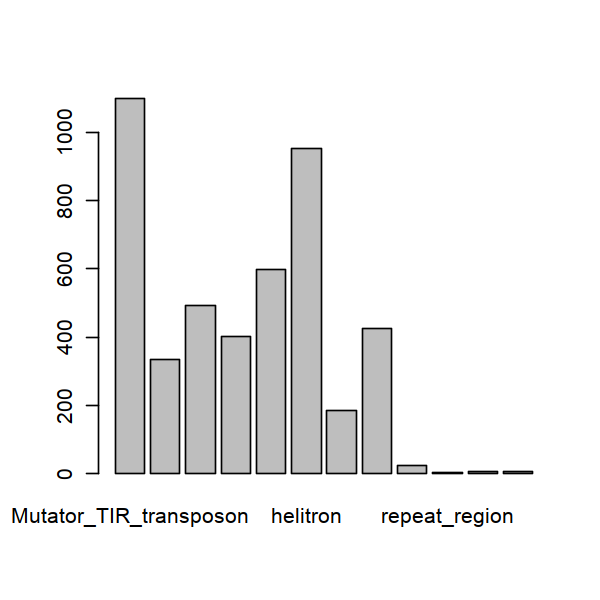

In [104]:
barplot(colSums(data[3:ncol(data)],))

In [76]:
ggplot(melt(data), aes(x=gene_type, y=value, fill=variable))+
    geom_bar()

Using gene_name, gene_type as id variables

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         

In [132]:
data <- read.csv("/work/WGD/homeobox/braker_ohnologs/for_paper/dataframe.csv", header =T)


In [170]:
colors <- c("white", 
            "lightblue", 
            "blue", 
            "purple", 
            "purple", 
            "purple", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red")

options(repr.plot.width=20, repr.plot.height=15)
ggplot(melt(data), aes(x=variable, y=X, fill=factor(value)))+geom_tile(na.rm=T)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
scale_fill_manual(values=colors)

Using HD, type, species as id variables

ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'X' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content

In [2]:
data <- read.csv("/work/WGD/homeobox/braker_ohnologs/for_paper/dataframe_melted.csv", header =TRUE)


In [3]:
data$HD <- as.factor(data$HD)
data$type <- as.factor(data$type)
data$species <- as.factor(data$species)

In [4]:
head(data)

data <- data[data$count != 0,]

unique(data$species)

X HD     type species count
1 0 Hox6-8 anno DERSIL  5    
2 1 Hox6-8 anno HAELON  4    
3 2 Hox6-8 anno ECTDAV  5    
4 3 Hox6-8 anno DYSSIL  7    
5 4 Hox6-8 anno ULODIV  5    
6 5 Hox6-8 anno LATELE  7

[1] DERSIL HAELON ECTDAV DYSSIL ULODIV LATELE PARTEP HYLGRA OEDGIB ARGBRU
[11] TRIANT TRICLA CARROT TACGIG
14 Levels: ARGBRU CARROT DERSIL DYSSIL ECTDAV HAELON HYLGRA LATELE ... ULODIV

In [17]:
sp <- c(     'DERSIL'="D. silvarum",
             'HAELON'="H. longicornis",
             'DYSSIL'="D. silvatica",
             'ECTDAV'="E. davidi",
             'HYLGRA'="H. graminicola",
             'ULODIV'="U. diversus",
             'OEDGIB'="O. gibbosus",
             'LATELE'="L. elegans",
             'PARTEP'="P. tepidariorum",
             'ARGBRU'="A. bruennichi",
             'TRIANT'="T. antipodiana",
             'TRICLA'="T. clavata",
             'CARROT'="C. rotundicauda",
             'TACGIG'="T. gigas"
            )

ty <- c(     'anno'   ="All genes",
             '1.5C'   ="Ohnologs",
             'whdis'  ="Dispersed wh",
             'whtan'  ="Tandem wh",
             'whseg'  ="Segmental wh",
             'whsin'  ="Singleton wh",
             'whpro'  ="Proximal wh",
             'wohdis' ="Dispersed woh",
             'wohtan' ="Tandem woh",
             'wohseg' ="Segmental woh",
             'wohsin' ="Singleton woh",
             'wohpro' ="Proximal woh"
            )

In [18]:
#data$type = factor(data$type, levels=c("all genes",
#"ohnologs",
#"dispersed wh",
#"tandem wh",
#"segmental wh",
#"singleton wh",
#"proximal wh",
#"dispersed woh",
#"tandem woh",
#"segmental woh",
#"singleton woh",
#"proximal woh"))


data$type = factor(data$type, levels=c('anno'  ,
'1.5C'  ,
'whseg' ,
'wohseg',
'whdis' ,
'wohdis',
'whpro' ,
'wohpro',
'whtan' ,
'wohtan',
'whsin' ,
'wohsin'))

data$species = factor(data$species, levels=c('DERSIL',
'HAELON',
'DYSSIL',
'ECTDAV',
'HYLGRA',
'ULODIV',
'OEDGIB',
'LATELE',
'PARTEP',
'ARGBRU',
'TRIANT',
'TRICLA',
'CARROT',
'TACGIG'))

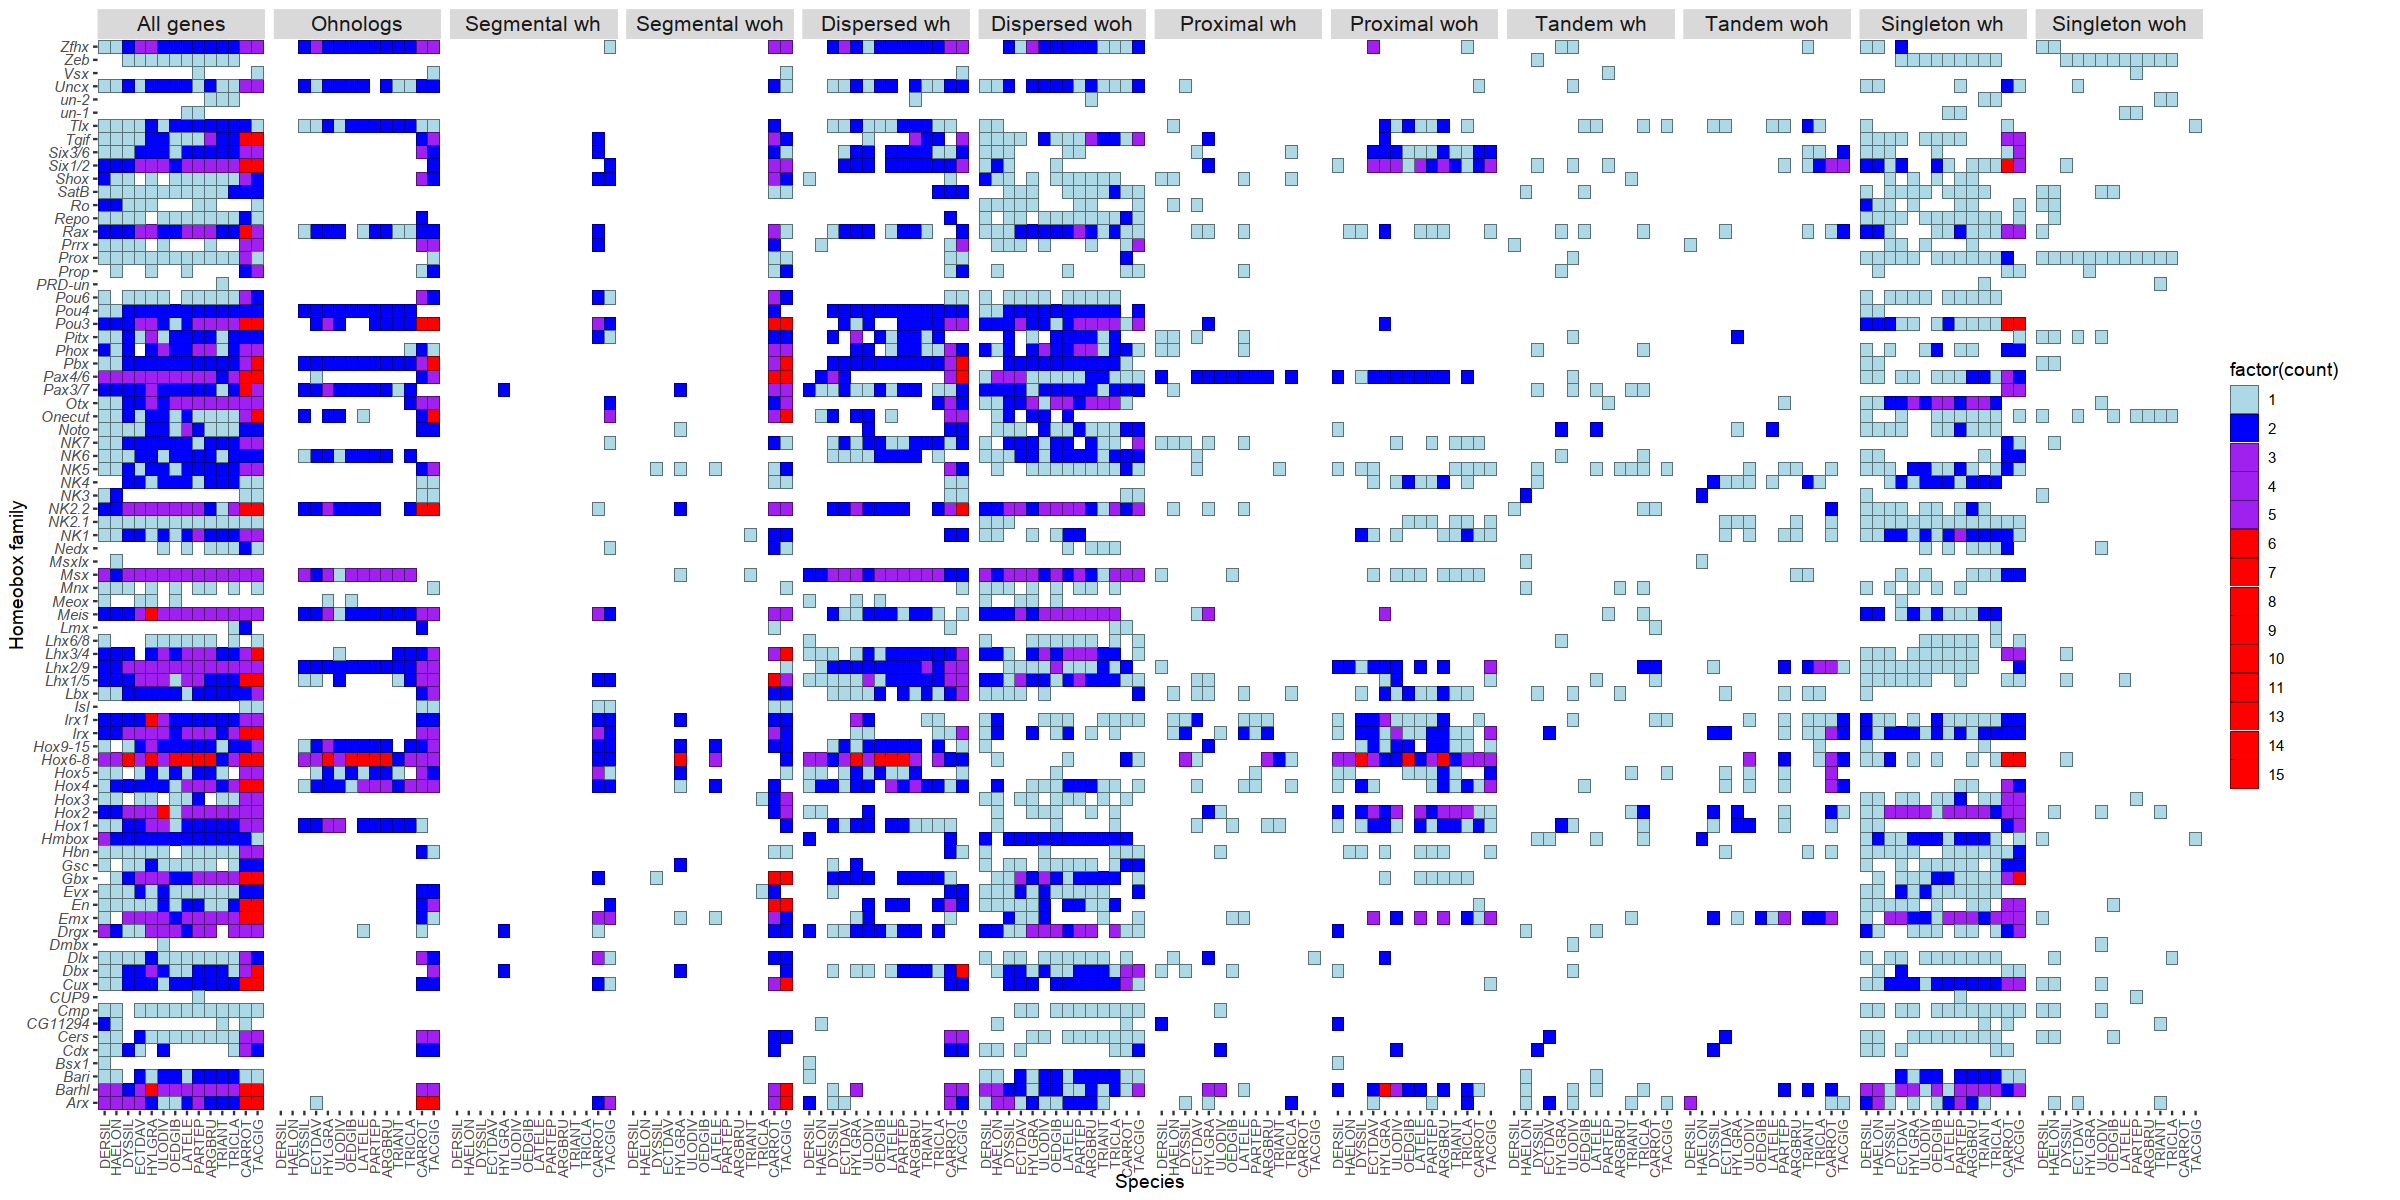

In [60]:
colors <- c("lightblue", 
            "blue", 
            "purple", 
            "purple", 
            "purple", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red", 
            "red",
            "red", 
            "red", 
            "red", 
            "red")

options(repr.plot.width=20, repr.plot.height=10)
ggplot(data[2:5], aes(x=factor(species), y=HD, fill=factor(count)))+
    geom_tile(color = "black",linewidth=0.1)+
    scale_fill_manual(values=colors)+
    facet_grid(.~type,labeller=as_labeller(ty))+
    xlab("Species")+
    ylab("Homeobox family")+ 
    theme(panel.background = element_rect(fill="white"),
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=8,family = "mono"),
      strip.text = element_text(size=12),
      text = element_text(family = "mono"),
      axis.text.y = element_text(face = "italic",family = "mono")
         )

In [63]:
library(showtext)

ERROR: Error in library(showtext): there is no package called ‘showtext’


In [64]:
library(showtext)
font_add_google("mono")

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Warning message in install.packages("showtext"):
“installation of package ‘sysfonts’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtextdb’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtext’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

